**Course Name：** DAT341 / DIT867 Applied Machine Learning

**Examiner：** Richard Johansson (richajo@chalmers.se)

**Assignment No.:** Assignment 1 - Introductory tour and Decision Trees

**Release Date:** Mon, 15 Jan 2024 0:00am

**Due Date:** Mon, 22 Jan 2024 11:59pm

**Group Name:** PA 1 30

**Group Members:**
- Natalia Alvarado (gusalvarsi@student.gu.se)
- Erdem Halil (gushaliler@student.gu.se)
- Xujie Li (guslixuf@student.gu.se)


In [1]:
# consent Google drive
from google.colab import drive
import sys

drive.mount('/content/drive')

# Adjust the path to point to the folder in Google Drive
folder_path = '/content/drive/My Drive/DIT867_AML/Assignment_1'
sys.path.append(folder_path)


Mounted at /content/drive


# Task 1: A classification example: fetal heart condition diagnosis
## Step 1. Reading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the CSV file.
data = pd.read_csv(f'{folder_path}/CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', \
                 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', \
                 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


In [3]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


## Step 2. Training the baseline classifier

The baseline classifier 'DummyClassifier' makes predictions that ignore the input features.

In [4]:
from sklearn.dummy import DummyClassifier
baseline_clf = DummyClassifier(strategy='most_frequent')


The cross-validation function 'cross_val_score' evaluate a score by cross-validation. It splits the data in n-parts to run the model and establish its accuracy.

In [5]:
from sklearn.model_selection import cross_val_score
baseline_cv_score = cross_val_score(baseline_clf, Xtrain, Ytrain, cv=5)
baseline_cv_score


array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

In [6]:
# Aggregate these scores
baseline_mean_cv_score = baseline_cv_score.mean()
baseline_mean_cv_score


0.7805882352941176

## Step 3. Trying out some different classifiers

For this step, we run the cross-validation function on several models:
- Decision Tree
- Random Forest (Construction of multiple decision trees to avoid overfitting)
- Gradient Boosting (['trains the model sequentially and each new model tries to correct the previous model'](https://www.geeksforgeeks.org/ml-gradient-boosting/) geeksforgeeks.org)
- Perceptron (A simple neural network with a stochastic gradient descent [sklearn - Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier))
- Logistic Regression (A linear classification model using a logistic function[sklearn - Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))
- Linear SVC (Support Vector Classification: 'find the maximum separating hyperplane between the different classes available in the target feature' [geersforgeeks.org](https://www.geeksforgeeks.org/support-vector-machine-algorithm/))

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Linear SVC': LinearSVC(max_iter=1000, dual=False),
    'MLP Classifier': MLPClassifier(max_iter=1000)
}

other_mean_cv_scores = {name: cross_val_score(model, Xtrain_scaled, Ytrain, cv=5).mean() for name, model in models.items()}


In [8]:
print(f"All classifiers' accuracy scores are shown below.")
other_mean_cv_scores_df = pd.DataFrame.from_dict(other_mean_cv_scores, orient='index', columns=['Accuracy'])
other_mean_cv_scores_df


All classifiers' accuracy scores are shown below.


,Accuracy
Decision Tree,0.924118
Random Forest,0.938235
Gradient Boosting,0.950000
Perceptron,0.872941
Logistic Regression,0.891765
Linear SVC,0.890588
MLP Classifier,0.931176


In [9]:
best_classifier = max(other_mean_cv_scores.items(), key=lambda x: x[1])
print(f"The best classifier's accuracy score:\n{best_classifier}")


The best classifier's accuracy score:
('Gradient Boosting', 0.95)


In [10]:
# Tune some hyperparameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5),
    'Perceptron': Perceptron(eta0=0.1),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.5),
    'Linear SVC': LinearSVC(max_iter=1000, dual=False),
    'MLP Classifier': MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), alpha=0.001)
}

tunned_other_mean_cv_scores = {name: cross_val_score(model, Xtrain_scaled, Ytrain, cv=5).mean() for name, model in models.items()}


In [11]:
print(f"All classifiers' accuracy scores are shown below.")
tunned_other_mean_cv_scores_df = pd.DataFrame.from_dict(tunned_other_mean_cv_scores, orient='index', columns=['Accuracy'])
tunned_other_mean_cv_scores_df


All classifiers' accuracy scores are shown below.


,Accuracy
Decision Tree,0.930000
Random Forest,0.940000
Gradient Boosting,0.950000
Perceptron,0.874706
Logistic Regression,0.894118
Linear SVC,0.890588
MLP Classifier,0.930588


In [12]:
best_classifier = max(tunned_other_mean_cv_scores.items(), key=lambda x: x[1])
print(f"The best classifier's accuracy score after hyperparameter tunning:\n{best_classifier}")


The best classifier's accuracy score after hyperparameter tunning:
('Gradient Boosting', 0.95)


In [13]:
# Show the accuracy scores in a table
acc_df1 = pd.DataFrame.from_dict(other_mean_cv_scores, orient='index', columns=['Mean CV Score'])
acc_df2 = pd.DataFrame.from_dict(tunned_other_mean_cv_scores, orient='index', columns=['Mean CV Score(tunned)'])
acc_df = pd.concat([acc_df1, acc_df2], axis=1)
acc_df['Improvement'] = acc_df['Mean CV Score(tunned)'] - acc_df['Mean CV Score']
acc_df


,Mean CV Score,Mean CV Score(tunned),Improvement
Decision Tree,0.924118,0.930000,0.005882
Random Forest,0.938235,0.940000,0.001765
Gradient Boosting,0.950000,0.950000,0.000000
Perceptron,0.872941,0.874706,0.001765
Logistic Regression,0.891765,0.894118,0.002353
Linear SVC,0.890588,0.890588,0.000000
MLP Classifier,0.931176,0.930588,-0.000588


## Step 4. Final evaluation
From the above results, the best classifier for this data set is Gradient Boosting Classifier with tunned hyperparameters

In [14]:
from sklearn.metrics import accuracy_score
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5)
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))


0.9342723004694836


**Conclusion:**

We selected 7 classifiers in total, which are Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Perceptron, Logistic Regression, Linear SVC and MLP Classifier, whose accuracy scores are shown above.


# Task 2: Decision trees for classification

In [17]:
# The 'my_tree.py' code copied from https://www.cse.chalmers.se/~richajo/dit866/lectures/l1/Lecture%201.html
from my_tree import TreeClassifier
from sklearn.model_selection import cross_val_score

In [18]:
# compute the corss validation score
depth_acc = dict()
for i in range(1,20):
  cls = TreeClassifier(max_depth=i, criterion='gini')
  cls_score = np.mean(cross_val_score(cls, Xtrain, Ytrain))
  depth_acc[i] = cls_score

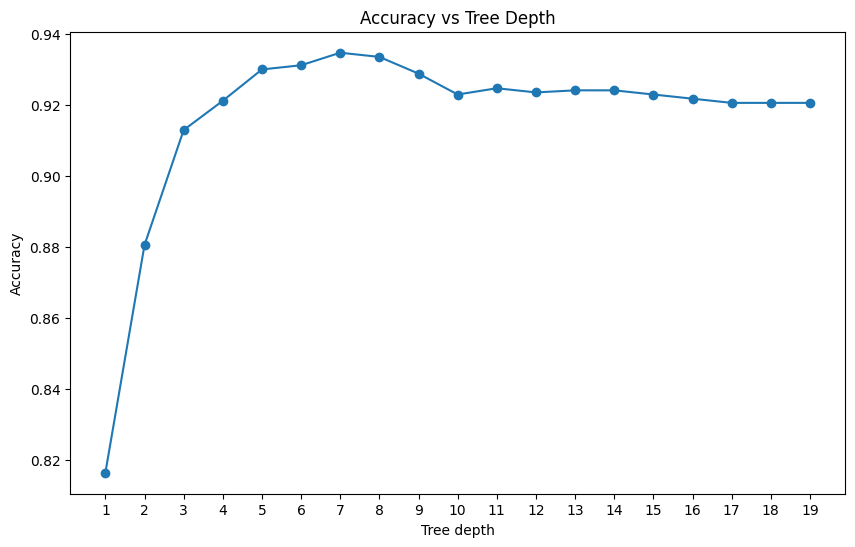

In [19]:
# plot the accuracy with different tree depth
plt.figure(figsize=(10, 6))
plt.plot(depth_acc.keys(), depth_acc.values(), marker='o')
plt.xticks(range(1, 20))
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Tree Depth")
plt.show();


In [20]:
best_depth = max(depth_acc.items(), key=lambda x: x[1])
print(f"The depth with the highest accuracy score:\n{best_depth}")

The depth with the highest accuracy score:
(7, 0.934705882352941)


We select 7 as the value of max_depth in TreeClassifier, which has a better performance over the cross-validation on average.


In [21]:
# evaluate the classi er on the test set.
from sklearn.metrics import accuracy_score

cls = TreeClassifier(max_depth=best_depth[0], criterion='gini')
cls.fit(Xtrain, Ytrain)
score = accuracy_score(Ytest, cls.predict(Xtest))
print(f"The evaluation score with the best tree depth {best_depth[0]} on test set is:{score}")


The evaluation score with the best tree depth 7 on test set is:0.9131455399061033


For the tree graph, we chose a max. depth of 3, so it is easier to read on screen.

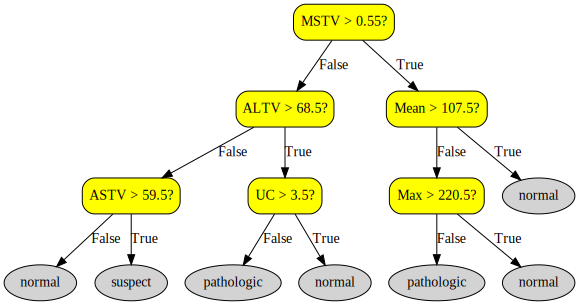

In [22]:
# visualize the learned decision tree
cls = TreeClassifier(max_depth=3, criterion='gini')
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

# Task 3: A regression example: predicting apartment prices

In [23]:
# Read the CSV file using Pandas.
alldata = pd.read_csv(f'{folder_path}/sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')


{'fit_time': array([0.00149488, 0.00135541, 0.00189686, 0.00140452, 0.00141001]),
 'score_time': array([0.00045466, 0.00070119, 0.00049639, 0.00038791, 0.00038433]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

For this step, we run the cross-validation function on several models:
- Linear regression (linear function of the relation target and features that minimizes the error function)
- Ridge (['Method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated'](https://en.wikipedia.org/wiki/Ridge_regression) Wikipedia - Ridge regressor)
- Lasso (['regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model'](https://en.wikipedia.org/wiki/Lasso_(statistics)) Wikipedia - Lasso)

- Decision tree regressor
- Random forest regressor
- Gradient boosting regressor
- MLP regressor

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

rgr_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'MLP Regressor': MLPRegressor()
}

rgr_cv_scores = {name: cross_validate(model, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score'].mean() for name, model in rgr_models.items()}

In [27]:
print("All regressors' Negative MSE are shown below.")
rgr_cv_scores_df = pd.DataFrame.from_dict(rgr_cv_scores, orient='index', columns=['Negative MSE'])
rgr_cv_scores_df

All regressors' Negative MSE are shown below.


,Negative MSE
Linear Regression,-0.301399
Ridge,-0.301398
Lasso,-0.301047
Decision Tree Regressor,-0.531602
Random Forest Regressor,-0.283470
Gradient Boosting Regressor,-0.264577
MLP Regressor,-1779.211984


In [28]:
best_rgr_classifier = max(rgr_cv_scores.items(), key=lambda x: x[1])
print(f"The best regressor's Negative MSE:\n{best_rgr_classifier}")

The best regressor's Negative MSE:
('Gradient Boosting Regressor', -0.26457693792409176)


From the above results, the best Regressor for this data set is Gradient Boosting Regressor.

In [29]:
from sklearn.metrics import mean_squared_error

gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, Ytrain)
print(f"MSE for Gradient Boosting Regressor on test set: {mean_squared_error(Ytest, gbr.predict(Xtest))}")

MSE for Gradient Boosting Regressor on test set: 0.27146303472068783


After implementing the different regression models, we run the best model, the Gradient Boosting Regressor, on the test set. This model performs better at predicting prices given that it improves by minimizing the loss function on each iteration.

# Task 4: Decision trees for regression
## Step 1. Implementing the regression model

In [30]:
# The 'my_tree.py' code copied from https://www.cse.chalmers.se/~richajo/dit866/lectures/l1/Lecture%201.html
from my_tree import DecisionTree
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, homogeneity_threshold=0.01):
        super().__init__(max_depth)
        self.homogeneity_threshold = homogeneity_threshold

    def get_default_value(self, Y):
        # The default value in a regression tree is the mean of Y
        return np.mean(Y)

    def is_homogeneous(self, Y):
        # Checks whether all values in Y are close enough to some standard deviation threshold
        # as a criterion for homogeneity
        return np.std(Y) < self.homogeneity_threshold

    def best_split(self, X, Y, feature):
        # Sort the data along the given feature
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = X[sorted_indices, feature]
        Y_sorted = Y[sorted_indices]

        # Pre-calculate the total sum and sum of squares for Y
        n = len(Y_sorted)
        total_sum = np.sum(Y_sorted)
        total_sum_sq = np.sum(Y_sorted ** 2)
        low_sum = 0.0
        low_sum_sq = 0.0
        high_sum = total_sum
        high_sum_sq = total_sum_sq

        # Initialize variables to track the best split
        max_variance_reduction = -np.inf
        max_i = None

        # Iterate through the sorted features, excluding the last item
        for i in range(1, n):
            # Update the sums and sum of squares for the low and high partitions
            y_i = Y_sorted[i - 1]
            low_sum += y_i
            low_sum_sq += y_i ** 2
            high_sum -= y_i
            high_sum_sq -= y_i ** 2

            n_L = i
            n_H = n - i

            # Avoid splitting between identical feature values
            if X_sorted[i] == X_sorted[i - 1]:
                continue

            # Calculate the variance for the two partitions
            low_variance = (low_sum_sq - (low_sum ** 2) / n_L) / n_L
            high_variance = (high_sum_sq - (high_sum ** 2) / n_H) / n_H
            total_variance = (total_sum_sq - (total_sum ** 2) / n) / n

            # Calculate the variance reduction
            variance_reduction = total_variance - (n_L/n) * low_variance - (n_H/n) * high_variance

            # If this is the best split so far, remember it
            if variance_reduction > max_variance_reduction:
                max_variance_reduction = variance_reduction
                max_i = i

        # If no split was found (all feature values are identical), return a placeholder
        if max_i is None:
            return -np.inf, None, None

        # The best threshold is the midpoint between two consecutive feature values
        split_point = 0.5 * (X_sorted[max_i - 1] + X_sorted[max_i])
        return max_variance_reduction, feature, split_point


## Step 2. Sanity check

We use generated dat set for this sanity check.

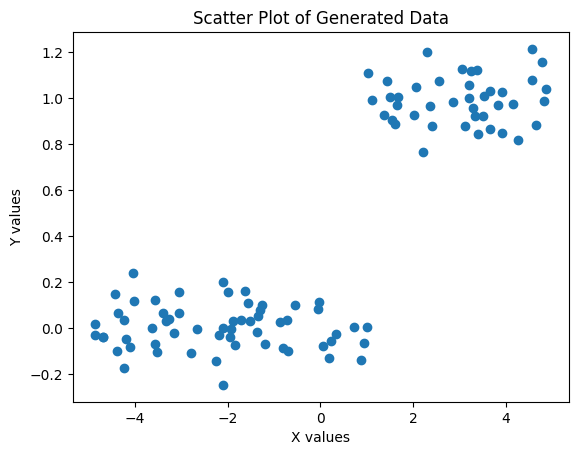

In [31]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(n=100)

# Plotting
plt.scatter(X, Y)
plt.title("Scatter Plot of Generated Data")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show();


We use the Decision Tree Regressor to describe this data, because the target Y in this data set is continuous values.

Given the information we can assume from the plot above, we start with a max. depth of 2.

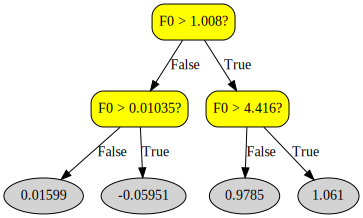

In [32]:
tree_regressor = TreeRegressor(max_depth=2)
tree_regressor.fit(X, Y)
tree_regressor.draw_tree()


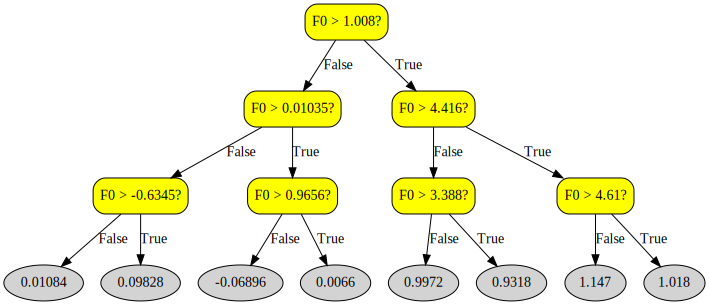

In [33]:
# try to increase the depth of the tree.
tree_regressor = TreeRegressor(max_depth=3)
tree_regressor.fit(X, Y)
tree_regressor.draw_tree()


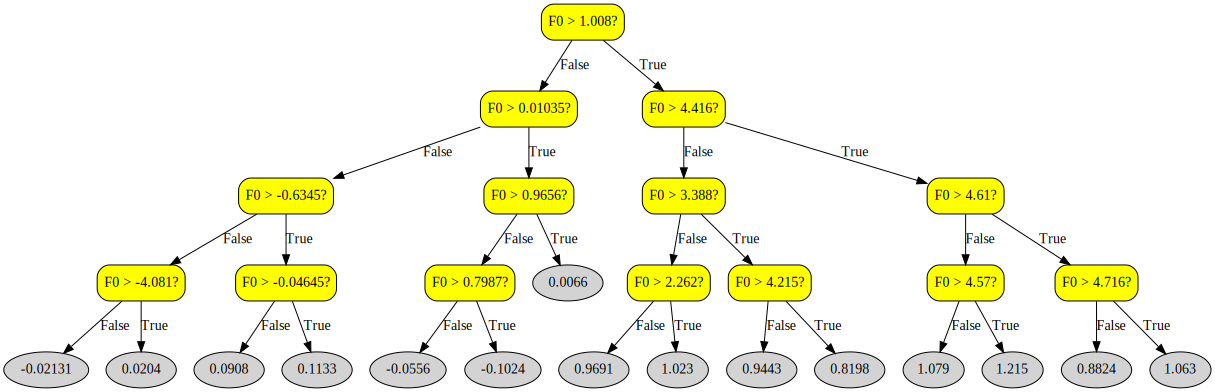

In [34]:
# try to increase the depth of the tree.
tree_regressor = TreeRegressor(max_depth=4)
tree_regressor.fit(X, Y)
tree_regressor.draw_tree()

**Observations:**

In the decision tree regressor model, as well as with the Decistion tree in Task 2; the gains from allowsing for more depth increase. However, it might stop being benefitial after a certain value.

A tree with a depth of 2 may not be able to capture all patterns in the data, a tree with a depth of 3 will be able to capture more complex patterns because it can do more splits, while a tree with a depth of 4 will be able to capture finer data. However, allowing for a deeper tree also might lead to overfitting; a common problem with decision trees.

## Step 3. Predicting apartment prices using decision tree regression

We plot the MSE curve to decise which is the best depth for the tree.

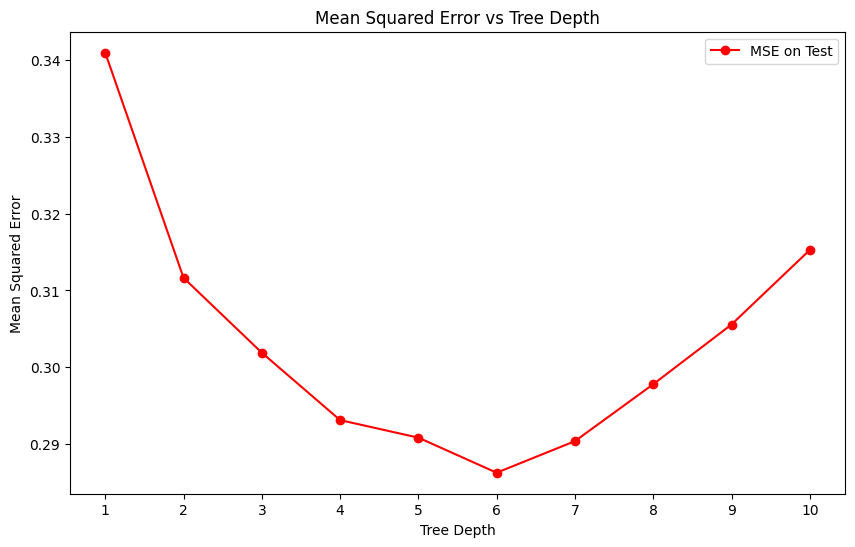

In [35]:
from sklearn.metrics import mean_squared_error

MSE = []
for i in range(1, 11):
    regr = TreeRegressor(max_depth=i)
    regr.fit(Xtrain, Ytrain)
    mse = mean_squared_error(Ytest, regr.predict(Xtest))
    MSE.append(mse)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), MSE, color='red', marker='o', label='MSE on Test')
plt.title("Mean Squared Error vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Mean Squared Error")
plt.xticks(range(1, 11))
plt.legend()
plt.show();


In [36]:
min_mse_index = np.argmin(np.array(MSE))
min_mse_index + 1

6

Given than the best accuracy is achieved with a max. depth of 6, we continue with this value.

In [37]:
tree_regressor = TreeRegressor(max_depth=6)
tree_regressor.fit(Xtrain, Ytrain)
score = mean_squared_error(Ytest, tree_regressor.predict(Xtest))
print(f'MSE with max.depth = 6 {score}.')


MSE with max.depth = 6 0.28624256155337435.


## Step 4. Underfitting and overfitting

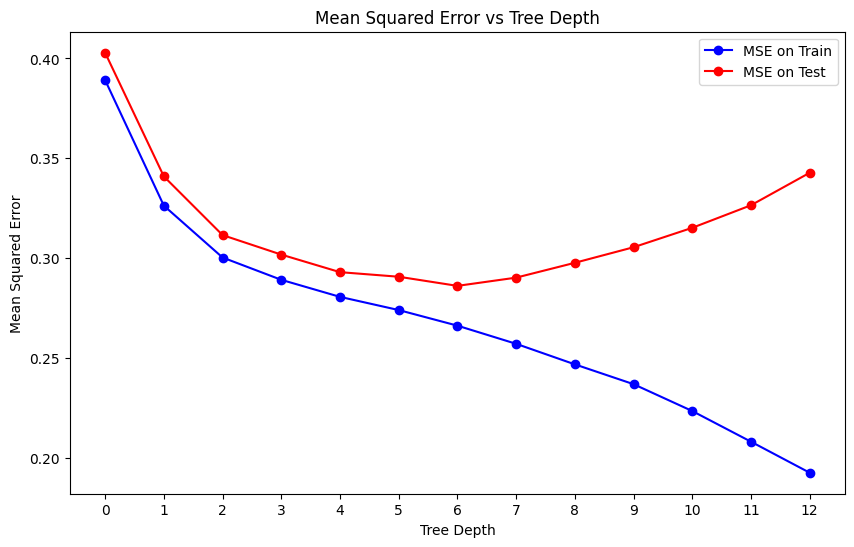

In [38]:
MSE_train = []
MSE_test = []
tree_depth = range(0, 13)
for i in tree_depth:
    regr = TreeRegressor(max_depth=i)
    regr.fit(Xtrain, Ytrain)
    MSE_train.append(mean_squared_error(Ytrain, regr.predict(Xtrain)))
    MSE_test.append(mean_squared_error(Ytest, regr.predict(Xtest)))

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(tree_depth, MSE_train, marker='o', color='blue', label='MSE on Train')
plt.plot(tree_depth, MSE_test, marker='o', color='red', label='MSE on Test')
plt.title("Mean Squared Error vs Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Mean Squared Error")
plt.xticks(tree_depth)
plt.legend()
plt.show();


**Observations:**

- As can be seen from the above plot, when the depth of the tree is less than 6, the MSE decreases as the depth of the tree increases in both the training set and the test set, indicating that the model is underfitted. At values above 6, the MSE on the cross-validation incrementally decreases, but the MSE on the test set begins to increase, indicating that the decision tree is overfitted.
- This highlights one of the biggest challenged when using decision trees as the model tends to overfitting, so a strict model training on a subset of the data and keeping evaluation data to evaluate the final model.